In [152]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [153]:
# Membaca file customer_interactions.csv dan menyimpannya dalam dataframe df_interactions
df_interactions = pd.read_csv('dataset/customer_interactions.csv', delimiter=',')
# Membaca file product_details.csv dan menyimpannya dalam dataframe df_product
df_product = pd.read_csv('dataset/product_details.csv', delimiter=';')
# Membaca file purchase_history.csv dan menyimpannya dalam dataframe df_history
df_history = pd.read_csv('dataset/purchase_history.csv', delimiter=';')

# EDA CUSTOMER INTERACTIONS

In [154]:
# Menampilkan 5 baris pertama dari dataframe df_interactions
df_interactions.head()

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
2,3,30,150
3,4,15,80
4,5,22,110


In [155]:
# Menampilkan informasi tentang DataFrame df_interactions
df_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  5 non-null      int64
 1   page_views   5 non-null      int64
 2   time_spent   5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


In [156]:
# Menampilkan ringkasan statistik dari DataFrame df_interactions
df_interactions.describe()

,customer_id,page_views,time_spent
count,5.000000,5.00000,5.000000
mean,3.000000,22.40000,110.000000
std,1.581139,5.59464,27.386128
min,1.000000,15.00000,80.000000
25%,2.000000,20.00000,90.000000
50%,3.000000,22.00000,110.000000
75%,4.000000,25.00000,120.000000
max,5.000000,30.00000,150.000000


In [157]:
# Menghitung jumlah nilai null dalam DataFrame df_interactions
df_interactions.isnull().sum()

customer_id    0
page_views     0
time_spent     0
dtype: int64

# EDA DATA PRODUCT DETAIL

In [158]:
# Menampilkan ringkasan statistik dari DataFrame df_interactions
df_product.head()

,product_id,category,price,ratings,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,101,Electronics,500,4.5,NaN,NaN,NaN
1,102,Clothing,50,3.8,NaN,NaN,NaN
2,103,Home & Kitchen,200,4.2,NaN,NaN,NaN
3,104,Beauty,30,4.0,NaN,NaN,NaN
4,105,Electronics,800,4.8,NaN,NaN,NaN


In [159]:
# Menampilkan informasi tentang DataFrame df_product
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  5 non-null      int64  
 1   category    5 non-null      object 
 2   price       5 non-null      int64  
 3   ratings     5 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(4), int64(2), object(1)
memory usage: 408.0+ bytes


In [160]:
# Menampilkan ringkasan statistik dari DataFrame df_product
df_product.describe()

,product_id,price,ratings,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,5.000000,5.000000,5.000000,0.0,0.0,0.0
mean,103.000000,316.000000,4.260000,NaN,NaN,NaN
std,1.581139,329.438917,0.397492,NaN,NaN,NaN
min,101.000000,30.000000,3.800000,NaN,NaN,NaN
25%,102.000000,50.000000,4.000000,NaN,NaN,NaN
50%,103.000000,200.000000,4.200000,NaN,NaN,NaN
75%,104.000000,500.000000,4.500000,NaN,NaN,NaN
max,105.000000,800.000000,4.800000,NaN,NaN,NaN


In [161]:
# Menghitung jumlah nilai null dalam DataFrame df_product
df_product.isnull().sum()

product_id    0
category      0
price         0
ratings       0
Unnamed: 4    5
Unnamed: 5    5
Unnamed: 6    5
dtype: int64

# EDA DATA HISTORY PURCHASE

In [162]:
# Menampilkan beberapa baris pertama dari DataFrame df_history
df_history.head()

,customer_id,product_id,purchase_date,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,101,2023-01-01,NaN,NaN,NaN,NaN
1,1,105,2023-01-05,NaN,NaN,NaN,NaN
2,2,102,2023-01-02,NaN,NaN,NaN,NaN
3,3,103,2023-01-03,NaN,NaN,NaN,NaN
4,4,104,2023-01-04,NaN,NaN,NaN,NaN


In [163]:
# Menampilkan informasi tentang DataFrame df_history
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    6 non-null      int64  
 1   product_id     6 non-null      int64  
 2   purchase_date  6 non-null      object 
 3   Unnamed: 3     0 non-null      float64
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     0 non-null      float64
 6   Unnamed: 6     0 non-null      float64
dtypes: float64(4), int64(2), object(1)
memory usage: 464.0+ bytes


In [164]:
# Menampilkan ringkasan statistik dari DataFrame df_history
df_history.describe()

,customer_id,product_id,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,6.000000,6.000000,0.0,0.0,0.0,0.0
mean,2.666667,102.666667,NaN,NaN,NaN,NaN
std,1.632993,1.632993,NaN,NaN,NaN,NaN
min,1.000000,101.000000,NaN,NaN,NaN,NaN
25%,1.250000,101.250000,NaN,NaN,NaN,NaN
50%,2.500000,102.500000,NaN,NaN,NaN,NaN
75%,3.750000,103.750000,NaN,NaN,NaN,NaN
max,5.000000,105.000000,NaN,NaN,NaN,NaN


In [165]:
# Menghitung jumlah nilai null dalam DataFrame df_history
df_history.isnull().sum()

customer_id      0
product_id       0
purchase_date    0
Unnamed: 3       6
Unnamed: 4       6
Unnamed: 5       6
Unnamed: 6       6
dtype: int64

# REMOVE UNNECESSERY COLUMN

In [166]:
# Menghapus kolom yang tidak memiliki nama dari dataframe df_product
df_product = df_product.iloc[:, ~df_product.columns.str.contains('^Unnamed')]

In [167]:
df_product.head()

,product_id,category,price,ratings
0,101,Electronics,500,4.5
1,102,Clothing,50,3.8
2,103,Home & Kitchen,200,4.2
3,104,Beauty,30,4.0
4,105,Electronics,800,4.8


In [168]:
# Menghapus kolom yang tidak memiliki nama dari dataframe df_history
df_history = df_history.iloc[:, ~df_history.columns.str.contains('^Unnamed')]

In [169]:
df_history.head()

,customer_id,product_id,purchase_date
0,1,101,2023-01-01
1,1,105,2023-01-05
2,2,102,2023-01-02
3,3,103,2023-01-03
4,4,104,2023-01-04


# MERGE DATA

In [170]:
# Menggabungkan dataframe df_history, df_product, dan df_interactions berdasarkan kolom 'product_id' dan 'customer_id'
df_merge = pd.merge(df_history, df_product, on='product_id')
df_merge = pd.merge(df_merge, df_interactions, on='customer_id')
df_merge.head(10)

,customer_id,product_id,purchase_date,category,price,ratings,page_views,time_spent
0,1,101,2023-01-01,Electronics,500,4.5,25,120
1,1,105,2023-01-05,Electronics,800,4.8,25,120
2,5,101,2023-01-05,Electronics,500,4.5,22,110
3,2,102,2023-01-02,Clothing,50,3.8,20,90
4,3,103,2023-01-03,Home & Kitchen,200,4.2,30,150
5,4,104,2023-01-04,Beauty,30,4.0,15,80


# EDA CONTINUATION

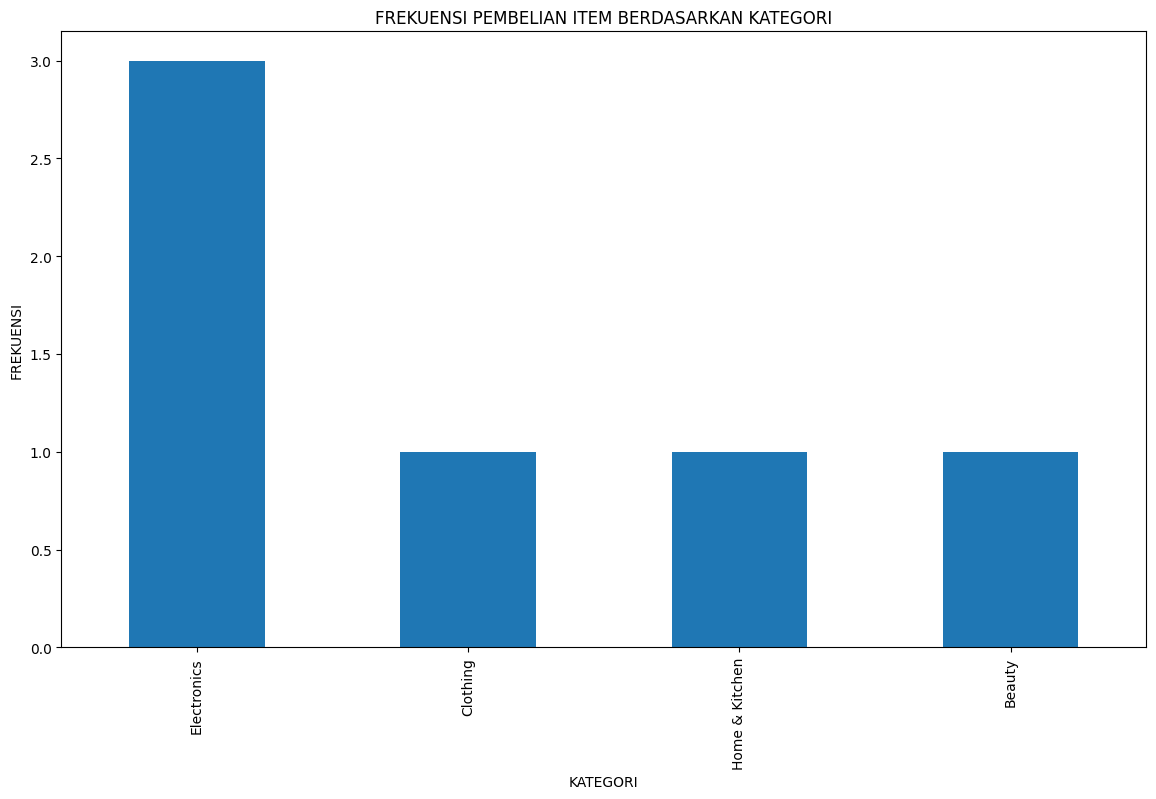

In [171]:
# Menghitung frekuensi pembelian item berdasarkan kategori
ax_category = df_merge['category'].value_counts().plot(kind='bar', figsize=(14,8), title="FREKUENSI PEMBELIAN ITEM BERDASARKAN KATEGORI")

# Menetapkan label sumbu x
ax_category.set_xlabel('KATEGORI')

# Menetapkan label sumbu y
ax_category.set_ylabel('FREKUENSI')

# Menampilkan plot
plt.show()

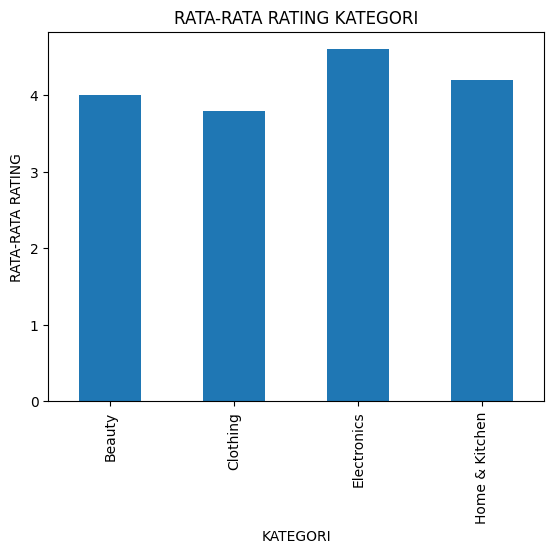

In [172]:
# Mengelompokkan data berdasarkan kategori dan menghitung rata-rata rating
ax_ratings = df_merge.groupby('category')['ratings'].mean()

# Membuat grafik batang dengan sumbu x adalah kategori dan sumbu y adalah rata-rata rating
ax_ratings = ax_ratings.plot.bar(x='category', y='ratings')

# Menambahkan judul pada grafik
ax_ratings.set_title('RATA-RATA RATING KATEGORI')

# Menambahkan label pada sumbu x
ax_ratings.set_xlabel('KATEGORI')

# Menambahkan label pada sumbu y
ax_ratings.set_ylabel('RATA-RATA RATING')

# Menampilkan grafik
plt.show()

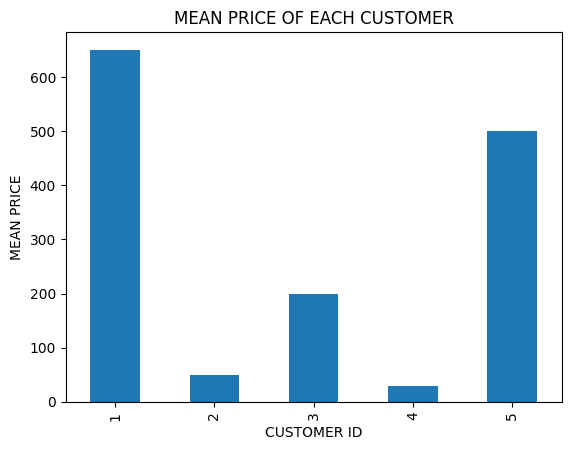

In [173]:
ax_ratings =  df_merge.groupby('customer_id')['price'].mean()
ax_ratings = ax_ratings.plot.bar(x='category', y='ratings')
ax_ratings.set_title('MEAN PRICE OF EACH CUSTOMER')
ax_ratings.set_xlabel('CUSTOMER ID')
ax_ratings.set_ylabel('MEAN PRICE')
plt.show()

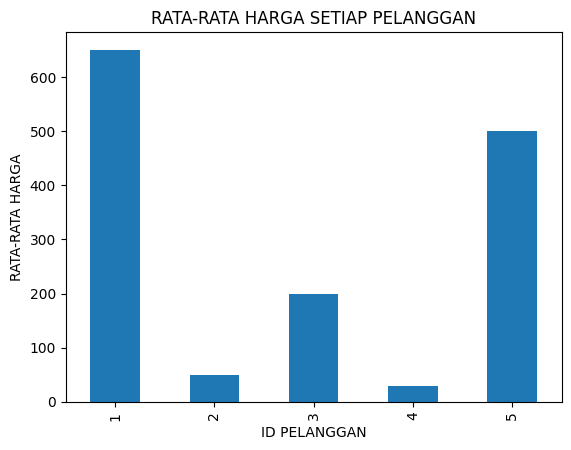

In [174]:
# Menghitung rata-rata harga untuk setiap pelanggan
ax_ratings = df_merge.groupby('customer_id')['price'].mean()

# Membuat grafik batang untuk menampilkan rata-rata harga
ax_ratings = ax_ratings.plot.bar(x='category', y='ratings')

# Menambahkan judul pada grafik
ax_ratings.set_title('RATA-RATA HARGA SETIAP PELANGGAN')

# Menambahkan label sumbu x pada grafik
ax_ratings.set_xlabel('ID PELANGGAN')

# Menambahkan label sumbu y pada grafik
ax_ratings.set_ylabel('RATA-RATA HARGA')

# Menampilkan grafik
plt.show()

In [175]:
# Mengubah kolom 'category' menjadi tipe data kategori
df_merge['id_category'] = df_merge['category'].astype('category').cat.codes
df_merge

,customer_id,product_id,purchase_date,category,price,ratings,page_views,time_spent,id_category
0,1,101,2023-01-01,Electronics,500,4.5,25,120,2
1,1,105,2023-01-05,Electronics,800,4.8,25,120,2
2,5,101,2023-01-05,Electronics,500,4.5,22,110,2
3,2,102,2023-01-02,Clothing,50,3.8,20,90,1
4,3,103,2023-01-03,Home & Kitchen,200,4.2,30,150,3
5,4,104,2023-01-04,Beauty,30,4.0,15,80,0


In [176]:
# Menghitung korelasi antara kolom-kolom dalam dataframe
correlation = df_merge.corr()

# Menerapkan gaya latar belakang gradien pada tampilan korelasi
correlation.style.background_gradient(cmap='coolwarm')

C:\Users\robby\AppData\Local\Temp\ipykernel_15140\295942007.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_merge.corr()


,customer_id,product_id,price,ratings,page_views,time_spent,id_category
customer_id,1.000000,-0.200000,-0.373230,-0.265684,-0.367120,-0.230159,-0.197642
product_id,-0.200000,1.000000,0.110089,0.132842,-0.079809,-0.032880,-0.197642
price,-0.373230,0.110089,1.000000,0.973779,0.444448,0.414060,0.498850
ratings,-0.265684,0.132842,0.973779,1.000000,0.466486,0.480461,0.525105
page_views,-0.367120,-0.079809,0.444448,0.466486,1.000000,0.978787,0.971652
time_spent,-0.230159,-0.032880,0.414060,0.480461,0.978787,1.000000,0.961769
id_category,-0.197642,-0.197642,0.498850,0.525105,0.971652,0.961769,1.000000


# BUILD MODEL PREDICTIVE

In [177]:
row_test = 2
row = df_merge.iloc[row_test]
df_test = row.to_frame().T.reset_index()
df_train = df_merge.drop(row_test)
df_train = df_train.reset_index(drop=True)

row_test = 2 - Menentukan nomor baris yang akan diuji. Penjelasan: Baris ini menginisialisasi variabel row_test dengan nilai 2, yang menunjukkan nomor baris yang akan diuji dalam dataframe.

row = df_merge.iloc[row_test] - Mengambil baris yang akan diuji dari dataframe. Penjelasan: Baris ini menggunakan metode iloc untuk mengambil baris dengan nomor yang ditentukan (row_test) dari dataframe df_merge dan menyimpannya dalam variabel row.

df_test = row.to_frame().T.reset_index() - Membuat dataframe uji dari baris yang dipilih. mengubah baris yang dipilih (row) menjadi dataframe dengan menggunakan metode to_frame(). Kemudian, dataframe tersebut diputar menggunakan metode T dan direset indeksnya menggunakan metode reset_index(). Hasilnya disimpan dalam variabel df_test.

df_train = df_merge.drop(row_test) - Membuat dataframe latihan dengan menghapus baris yang diuji. Penjelasan: Baris ini menghapus baris yang diuji (row_test) dari dataframe df_merge menggunakan metode drop(). Hasilnya disimpan dalam variabel df_train.

df_train = df_train.reset_index(drop=True) - Mengatur ulang indeks dataframe latihan. Penjelasan: Baris ini mengatur ulang indeks dataframe df_train menggunakan metode reset_index() dengan parameter drop=True. Hal ini dilakukan untuk menghindari indeks yang tidak teratur setelah baris dihapus.

In [178]:
# # Mengambil kolom 'time_spent', 'page_views', 'id_category', 'price' dari dataframe df_train dan menyimpannya dalam variabel x_train
# x_train = df_train[['time_spent', 'page_views', 'id_category', 'price']]

# # Mengambil kolom 'customer_id' dari dataframe df_train dan menyimpannya dalam variabel x_train
x_train = df_train[['customer_id']]

# Mengambil kolom 'product_id' dari dataframe df_train dan menyimpannya dalam variabel y_train
y_train = df_train['product_id']

In [179]:
# Mengambil kolom 'time_spent', 'page_views', 'id_category', 'price' dari dataframe df_test dan menyimpannya dalam variabel x_test
# x_test = df_test[['time_spent', 'page_views', 'id_category', 'price']]

# Mengambil kolom 'customer_id' dari dataframe df_test dan menyimpannya dalam variabel x_test
x_test = df_test[['customer_id']]

# Mengambil kolom 'product_id' dari dataframe df_test dan mengubah tipe datanya menjadi 'int64', kemudian menyimpannya dalam variabel y_test
y_test = df_test['product_id'].astype('int64')

In [180]:
# Membuat objek model RandomForestClassifier
model = RandomForestClassifier()

# Melatih model dengan data latih
model.fit(x_train, y_train)

RandomForestClassifier()

In [181]:
# Menggunakan model untuk melakukan prediksi pada data uji
y_pred = model.predict(x_test)

# Menghitung akurasi prediksi dengan membandingkan hasil prediksi dengan label sebenarnya
accuracy = accuracy_score(y_test, y_pred, normalize=False)

In [182]:
y_pred_proba = model.predict_proba(x_test)
classes = model.classes_

for index, val in enumerate(classes):
    print(val, y_pred_proba[0][index])

101 0.0
102 0.09
103 0.28
104 0.63
105 0.0


y_pred_proba = model.predict_proba(x_test): Baris ini digunakan untuk memprediksi probabilitas kelas dari data uji (x_test) menggunakan model yang telah dilatih (model). Hasil prediksi akan disimpan dalam variabel y_pred_proba.

classes = model.classes_: Baris ini digunakan untuk mendapatkan daftar kelas yang digunakan dalam model. Variabel classes akan berisi daftar kelas yang dapat diprediksi oleh model.

for index, val in enumerate(classes): Baris ini digunakan untuk melakukan iterasi melalui setiap kelas dalam variabel classes. Variabel index akan berisi indeks kelas, sedangkan variabel val akan berisi nilai kelas.

print(val, y_pred_proba[0][index]): Baris ini digunakan untuk mencetak nilai kelas (val) dan probabilitas prediksi untuk kelas tersebut (y_pred_proba[0][index]). Dalam hal ini, y_pred_proba[0][index] mengacu pada probabilitas prediksi untuk kelas pertama dalam data uji.

In [183]:
# Membuka file 'model.pkl' dengan mode write binary (wb)
# dan menyimpan model ke dalam file tersebut menggunakan pickle.dump()

with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [184]:
# Membuka file 'model.pkl' dalam mode baca ('rb')
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)